In [1]:
#import numpy to use seed 
import numpy as np
import pandas as pd
from numpy.random import seed
np.random.seed(1)

In [2]:
#import other dependencies

import os
import tensorflow 
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense

Read CSV create, and clean dataframe

In [3]:
#Read in CSV and create dataframe
mlb_teams= pd.read_csv("Team Statistics.csv")

mlb_teams

,YR,LG,Name,G,W,L,WSWin,Unnamed: 7,R,H,2B,3B,HR,BB,Unnamed: 14,SO,ERA,SHO,SV,FP
0,1969,NL,Atlanta Braves,162,93,69,N,NaN,691,1411,195,22,141,485,NaN,665,3.53,7,42,0.981
1,1969,AL,Baltimore Orioles,162,109,53,N,NaN,779,1465,234,29,175,634,NaN,806,2.83,20,36,0.984
2,1969,AL,Boston Red Sox,162,87,75,N,NaN,743,1381,234,37,197,658,NaN,923,3.92,7,41,0.975
3,1969,AL,California Angels,163,71,91,N,NaN,528,1221,151,29,88,516,NaN,929,3.54,9,39,0.978
4,1969,AL,Chicago White Sox,162,68,94,N,NaN,625,1346,210,27,112,552,NaN,844,4.21,10,25,0.981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1403,2019,NL,St. Louis Cardinals,162,91,71,N,NaN,764,1336,246,24,210,561,NaN,1420,3.80,14,52,0.989
1404,2019,AL,Tampa Bay Rays,162,96,66,N,NaN,769,1427,291,29,217,542,NaN,1493,3.65,12,46,0.985
1405,2019,AL,Texas Rangers,162,78,84,N,NaN,810,1374,296,24,223,534,NaN,1578,5.06,9,33,0.982
1406,2019,AL,Toronto Blue Jays,162,67,95,N,NaN,726,1299,270,21,247,509,NaN,1514,4.79,7,33,0.984


In [4]:
#Get list of dataframe columns

mlb_teams.columns

Index(['YR', 'LG', 'Name', 'G', 'W', 'L', 'WSWin', 'Unnamed: 7', 'R', 'H',
       '2B', '3B', 'HR', 'BB', 'Unnamed: 14', 'SO', 'ERA', 'SHO', 'SV', 'FP'],
      dtype='object')

In [5]:
#Select columns for dataframe

mlb_df = mlb_teams[['YR', 'LG', 'Name', 'G', 'W', 'L', 'WSWin', 'R', 'H',
                   '2B', '3B', 'HR', 'BB', 'SO', 'ERA', 'SHO', 'SV', 'FP']]
mlb_df.head(20)

,YR,LG,Name,G,W,L,WSWin,R,H,2B,3B,HR,BB,SO,ERA,SHO,SV,FP
0,1969,NL,Atlanta Braves,162,93,69,N,691,1411,195,22,141,485,665,3.53,7,42,0.981
1,1969,AL,Baltimore Orioles,162,109,53,N,779,1465,234,29,175,634,806,2.83,20,36,0.984
2,1969,AL,Boston Red Sox,162,87,75,N,743,1381,234,37,197,658,923,3.92,7,41,0.975
3,1969,AL,California Angels,163,71,91,N,528,1221,151,29,88,516,929,3.54,9,39,0.978
4,1969,AL,Chicago White Sox,162,68,94,N,625,1346,210,27,112,552,844,4.21,10,25,0.981
5,1969,NL,Chicago Cubs,163,92,70,N,720,1400,215,40,142,559,928,3.34,22,27,0.979
6,1969,NL,Cincinnati Reds,163,89,73,N,798,1558,224,42,171,474,1042,4.11,11,44,0.973
7,1969,AL,Cleveland Indians,161,62,99,N,573,1272,173,24,119,535,906,3.94,7,22,0.976
8,1969,AL,Detroit Tigers,162,90,72,N,701,1316,188,29,182,578,922,3.31,20,28,0.979
9,1969,NL,Houston Astros,162,81,81,N,676,1284,208,40,104,699,972,3.60,11,34,0.975


In [6]:
#Set X(data) and y(team)variables

data = mlb_df.drop("Name", axis=1)
team = mlb_df["Name"]
print(data.shape, team.shape)

(1408, 17) (1408,)


In [7]:
#Use getdummies to convert strings

data_LG = data.copy()
data_bin = pd.get_dummies(data_LG, columns=["LG", "WSWin"])
data_bin = data_bin.drop(columns=['LG_AL','WSWin_N'])

data_bin.head()


,YR,G,W,L,R,H,2B,3B,HR,BB,SO,ERA,SHO,SV,FP,LG_NL,WSWin_Y
0,1969,162,93,69,691,1411,195,22,141,485,665,3.53,7,42,0.981,1,0
1,1969,162,109,53,779,1465,234,29,175,634,806,2.83,20,36,0.984,0,0
2,1969,162,87,75,743,1381,234,37,197,658,923,3.92,7,41,0.975,0,0
3,1969,163,71,91,528,1221,151,29,88,516,929,3.54,9,39,0.978,0,0
4,1969,162,68,94,625,1346,210,27,112,552,844,4.21,10,25,0.981,0,0


Preprocess data

In [8]:
#Import SciKit libraries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical

In [21]:
#Split data and teams into training and test data

X_train, X_test, y_train, y_test = train_test_split(data_bin, team, random_state=60)
y_train

901        Baltimore Orioles
710            New York Mets
1017    Washington Nationals
250          Cincinnati Reds
1298          Houston Astros
                ...         
72            Atlanta Braves
99         California Angels
399        Toronto Blue Jays
1089          Houston Astros
205        Milwaukee Brewers
Name: Name, Length: 1056, dtype: object

In [22]:
#Scale data using MinMaxScaler

X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
X_train_scaled

array([[0.68      , 0.98360656, 0.43037975, ..., 0.65217391, 0.        ,
        0.        ],
       [0.54      , 0.96721311, 0.43037975, ..., 0.26086957, 1.        ,
        0.        ],
       [0.74      , 0.96721311, 0.43037975, ..., 0.43478261, 1.        ,
        0.        ],
       ...,
       [0.3       , 0.98360656, 0.65822785, ..., 0.52173913, 0.        ,
        0.        ],
       [0.8       , 0.96721311, 0.46835443, ..., 0.82608696, 1.        ,
        0.        ],
       [0.16      , 0.96721311, 0.37974684, ..., 0.43478261, 0.        ,
        0.        ]])

In [29]:
#Label-encode team

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)
encoded_y_test

array([ 6, 13, 24, 14, 31, 14,  3, 22, 15,  6, 20, 19,  8, 11, 11,  3,  7,
       22, 20, 21,  2, 27, 30, 26, 25, 22, 10, 10, 27,  9,  3, 13, 32, 16,
       18,  4, 16, 12, 26, 20, 27,  7,  1,  9, 33,  9, 14, 30,  5, 20, 14,
       27, 23, 33,  6, 34,  4, 19, 34, 33, 19,  8, 17, 19, 34, 14,  6, 36,
       14,  4, 32, 14, 34, 13, 22, 21, 19, 22, 20,  2, 34,  9,  8, 19, 19,
       16, 32, 27,  2,  2, 11, 14, 21, 16, 23, 21,  9, 24,  7, 11, 30, 14,
       26, 19, 22, 22,  3,  2, 11, 18, 23, 28,  4, 15, 32, 23,  2, 22,  4,
       27,  6,  7, 32,  8, 16,  9,  4,  5, 28, 35, 24,  7, 30, 13, 33,  4,
       18, 28,  6, 25, 21,  6, 11, 18, 25,  9, 22,  4, 24,  5, 21, 25,  2,
        3, 11, 26,  2,  7, 18, 27, 13,  7, 16,  4, 23,  4, 21, 25,  4, 26,
        4, 20, 18, 22, 13, 13, 13, 25,  5, 25,  9, 16, 13, 23, 31, 26,  3,
       11, 33, 35, 21, 21, 33, 24, 28, 27,  2, 10, 18, 35, 18,  4, 28,  7,
       22, 25, 11, 23, 18, 26, 26, 27,  6, 26, 33,  1, 21, 24,  7,  7, 26,
       24, 23, 34, 14, 14

In [33]:
##Import KNeighborsClassifier and train

from sklearn.neighbors import KNeighborsClassifier


In [35]:
# Loop through different k values to see which has the highest accuracy

train_scores = []
test_scores = []
for k in range(1, 60, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")

k: 1, Train/Test Score: 1.000/0.236
k: 3, Train/Test Score: 0.524/0.176
k: 5, Train/Test Score: 0.486/0.224
k: 7, Train/Test Score: 0.446/0.224
k: 9, Train/Test Score: 0.415/0.239
k: 11, Train/Test Score: 0.387/0.227
k: 13, Train/Test Score: 0.389/0.216
k: 15, Train/Test Score: 0.357/0.216
k: 17, Train/Test Score: 0.346/0.213
k: 19, Train/Test Score: 0.330/0.222
k: 21, Train/Test Score: 0.326/0.224
k: 23, Train/Test Score: 0.307/0.210
k: 25, Train/Test Score: 0.304/0.213
k: 27, Train/Test Score: 0.301/0.213
k: 29, Train/Test Score: 0.308/0.227
k: 31, Train/Test Score: 0.314/0.213
k: 33, Train/Test Score: 0.310/0.207
k: 35, Train/Test Score: 0.306/0.202
k: 37, Train/Test Score: 0.291/0.210
k: 39, Train/Test Score: 0.285/0.213
k: 41, Train/Test Score: 0.289/0.213
k: 43, Train/Test Score: 0.282/0.202
k: 45, Train/Test Score: 0.276/0.202
k: 47, Train/Test Score: 0.271/0.202
k: 49, Train/Test Score: 0.274/0.205
k: 51, Train/Test Score: 0.277/0.205
k: 53, Train/Test Score: 0.277/0.196
k: 55,

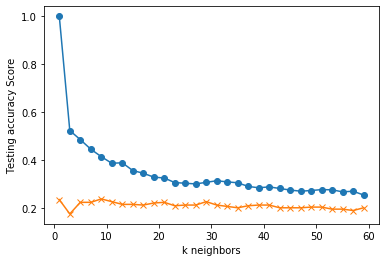

In [40]:
#Plot accuracy values

import matplotlib.pyplot as plt
plt.plot(range(1, 60, 2), train_scores, marker='o')
plt.plot(range(1, 60, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [42]:
knn = KNeighborsClassifier(n_neighbors=38)
knn.fit(X_train_scaled, y_train)
print('k=38 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=38 Test Acc: 0.213


Evaluate Model

In [17]:
#Make prediction using test data



Predict World Series Champs

In [43]:
##Print accuracy score for test data

